#IS 670 Lab 5: K Nearest Neighbor

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

In [30]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

## 1.Upload and clean data

In [32]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_Vishakha/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [33]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [34]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [35]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [36]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [37]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

In [38]:
# Examine tope five rows
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [39]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,No,3688,3680,4,89127,983,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,No,6868,7170,3,71271,1974,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,No,7801,7670,2,83338,2152,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,No,7355,7165,2,58698,1500,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
67207,Yes,7505,8265,6,94232,909,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
67208,Yes,3106,4950,6,79534,1506,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
67209,Yes,3534,5220,7,79394,3967,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
# Take the target and examine the porportion of target variable for each class
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

No     0.904539
Yes    0.095461
Name: IsBadBuy, dtype: float64


In [41]:
# Drop the target variable and put all the predictors in a new dataframe
predictors = carAuction.drop(['IsBadBuy'],axis=1)

In [42]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,0.149516,0.147826,0.444444,0.422170,0.088687,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.103242,0.066087,0.444444,0.759037,0.074048,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.192262,0.167246,0.333333,0.597223,0.214895,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.218381,0.181739,0.222222,0.706576,0.240193,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.205896,0.167101,0.222222,0.483285,0.147527,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,0.177090,0.153043,0.222222,0.459488,0.088687,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67207,0.210095,0.198986,0.666667,0.805300,0.063530,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67208,0.086949,0.102899,0.666667,0.672104,0.148380,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67209,0.098931,0.110725,0.777778,0.670835,0.498152,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## 2.Partition and balance the data set for K Nearest Neighbor model

In [43]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [44]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']
#print(len(majority_df), len(minority_df))
# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=int(1*len(minority_df)), random_state=55)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=1)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [45]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

No     0.5
Yes    0.5
Name: IsBadBuy, dtype: float64


In [46]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.900962
Yes    0.099038
Name: IsBadBuy, dtype: float64


## 3.K Nearest Neighbor model prediction



```
# This is formatted as code
```

### Build a K Nearest Neighbor model with n_neighbors = 1

In [59]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 1
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(predictors_train,target_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# Make predictions on training and testing data (1 points)
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

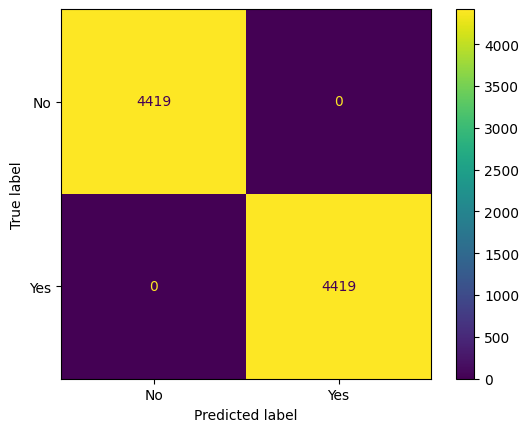

In [60]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_).plot()

In [61]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_train,prediction_on_train))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4419
         Yes       1.00      1.00      1.00      4419

    accuracy                           1.00      8838
   macro avg       1.00      1.00      1.00      8838
weighted avg       1.00      1.00      1.00      8838



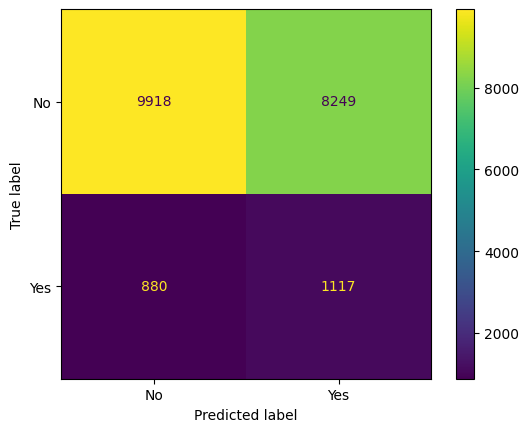

In [62]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_).plot()

In [63]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_test,prediction_on_test))


              precision    recall  f1-score   support

          No       0.92      0.55      0.68     18167
         Yes       0.12      0.56      0.20      1997

    accuracy                           0.55     20164
   macro avg       0.52      0.55      0.44     20164
weighted avg       0.84      0.55      0.64     20164



Q1. Compare the performances on training and testing sets by answering the following: <br>

a. Why we have perfect evaluation results on the training data? (1 points)<br>
- Due to the model is overfitted since the K-value is equal to 1.


b. Does the KNN model with n_neighbors = 1 generalize well on the testing set? why? (1 points)<br>
- No. The KNN model is overfitted using the train data. With only 1 neighbor, the model is highly sensitive to noise and outliers in the training data



Q2. Build a decision tree that achieves similar results as KNN with n_neighbors = 1 on the train data? How deep it will be? Compare its performance on the test data! If are have to pick between these models which one you select? why? (1 pts)
- The decision tree will have depth of 33. The Decision tree had an accuracy of 1 for train data which was very high when compared to the accuracy of Decision Tree for test data which was 0.56, I would prefer to choose the decision tree built on the test data, as it is not overfitting the model like the descision tree built on the train data.

              precision    recall  f1-score   support

          No       0.99      1.00      1.00      4419
         Yes       1.00      0.99      1.00      4419

    accuracy                           1.00      8838
   macro avg       1.00      1.00      1.00      8838
weighted avg       1.00      1.00      1.00      8838

              precision    recall  f1-score   support

          No       0.92      0.56      0.70     18167
         Yes       0.12      0.54      0.19      1997

    accuracy                           0.56     20164
   macro avg       0.52      0.55      0.45     20164
weighted avg       0.84      0.56      0.65     20164



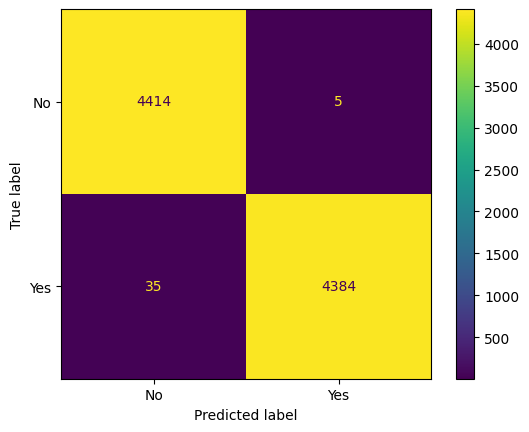

In [66]:
modelDecT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 33)
modelDecT.fit(predictors_train, target_train)

prediction_on_train = modelDecT.predict(predictors_train)
prediction_on_test=modelDecT.predict(predictors_test)
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelDecT.classes_).plot()
print(classification_report(target_train, prediction_on_train ))

print(classification_report(target_test, prediction_on_test))

### Build a K Nearest Neighbor model with n_neighbors = 4

In [65]:
model2 = KNeighborsClassifier(n_neighbors = 4)
model2.fit(predictors_train,target_train)

KNeighborsClassifier(n_neighbors=4)

In [67]:
# Make predictions on training and testing data
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

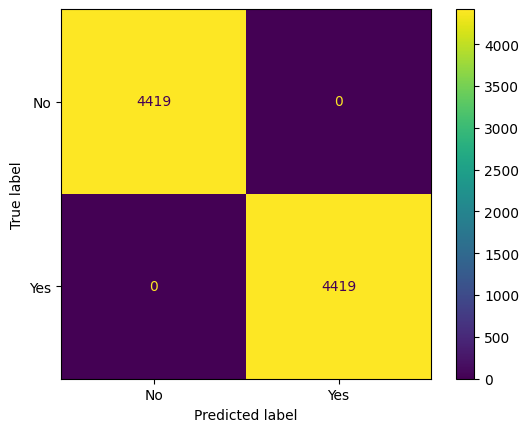

In [68]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()

In [69]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4419
         Yes       1.00      1.00      1.00      4419

    accuracy                           1.00      8838
   macro avg       1.00      1.00      1.00      8838
weighted avg       1.00      1.00      1.00      8838



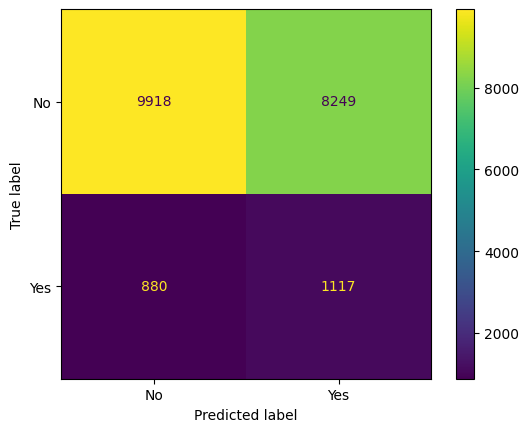

In [70]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()

In [71]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score \
print(classification_report(target_test,prediction_on_test))

              precision    recall  f1-score   support

          No       0.92      0.55      0.68     18167
         Yes       0.12      0.56      0.20      1997

    accuracy                           0.55     20164
   macro avg       0.52      0.55      0.44     20164
weighted avg       0.84      0.55      0.64     20164



Q3. Which KNN model is the best for identifying bad buy cars (n_neighbors=1 or 4)? and why?  (1 points)<br>



The KNN model with n_neighbors=4 is best for identifying bad buy cars because it is not sensitive to outlier when compared with n_neighbors=4 which is highly sensitive to the outliers.

```
# This is formatted as code
```

Q4. How the KNN model would performs if we increase the value of n_neighbors very large? (1 points)<br>
With more neighbors contributing to the predictions, the KNN model takes into account a wider range of points. This can lead to smoother decision boundaries, potentially reducing sensitivity to the outliers but at a certain extent or value it might lead to underfitting the model.

Q5. If we keep increasing K, what changes do you expect to see in the models performance with respect to both train and test sets? Examine your thoughts by coding the models in the following cell. Does your code supports your expectations? why? (2 pts)

As K goes up, more neighbors contibute to the predictions, generally leading to reduced variance and smoother decision boundaries. This often leads to higher accuracy.

              precision    recall  f1-score   support

          No       0.69      0.67      0.68      4419
         Yes       0.68      0.70      0.69      4419

    accuracy                           0.68      8838
   macro avg       0.68      0.68      0.68      8838
weighted avg       0.68      0.68      0.68      8838



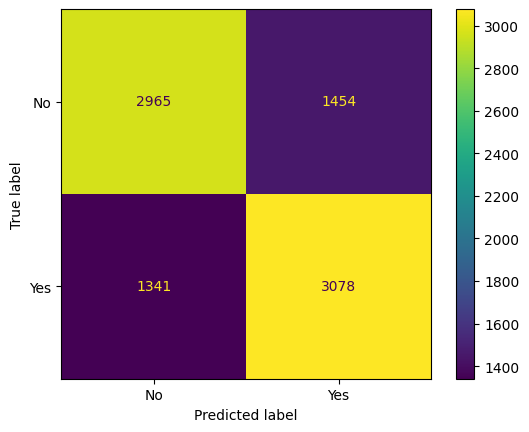

In [73]:
model2 = KNeighborsClassifier(n_neighbors = 9)
model2.fit(predictors_train,target_train)
prediction_on_train = model2.predict(predictors_train)
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.90      1.00      0.95     18167
         Yes       0.64      0.02      0.04      1997

    accuracy                           0.90     20164
   macro avg       0.77      0.51      0.49     20164
weighted avg       0.88      0.90      0.86     20164



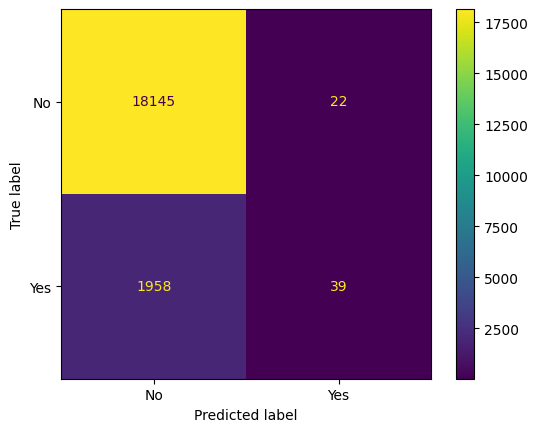

In [74]:
model2 = KNeighborsClassifier(n_neighbors = 9)
model2.fit(predictors_test,target_test)
prediction_on_test= model2.predict(predictors_test)
cm = confusion_matrix(target_test, prediction_on_test)
print(classification_report(target_test, prediction_on_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_).plot()

In [75]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IS670_lab05.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS670_lab05.ipynb to html
[NbConvertApp] Writing 877100 bytes to /content/drive/MyDrive/Colab Notebooks/IS670_lab05.html
